In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import librosa
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
#if chroma do short time fourier transform
#hstack() stacks arrays in sequence horizontally (in a columnar fashion)
#chroma-pertains to 12 pitch class,hstack() stacks arrays in sequence horizontally (in a columnar fashion),
#mel: Mel Spectrogram Frequency
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        sample_rate
      #  if chroma:
       #     stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:  #40
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:#frequency domain feature 12 features
            stft=np.abs(librosa.stft(X))
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel: #128 features
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))

    return result

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['neutral', 'calm', 'happy', 'fearful', 'surprised', 'angry']

In [ ]:
#DataFlair - Load the data and extract features for each sound file
def load_data():
    x,y=[],[]
    for file in glob.glob("C:\\Users\COMPUTER\Desktop\Speech_Recognition_dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)

        if emotion=='calm':
           emotion='not_confident'
           x.append(feature)
        #elif emotion=='fearful':
        #   emotion='not_confident'
        #   x.append(feature)
        elif emotion=='neutral':
           emotion='not_confident'
           x.append(feature)
        #elif emotion=='happy':
        #   emotion='confident'
        #   x.append(feature)

        elif emotion=='angry':
           emotion='confident'
           x.append(feature)
        elif emotion=='surprised':
           emotion='confident'
           x.append(feature)
        else:
            continue
        y.append(emotion)

    #return train_test_split(np.array(x), y, test_size=test_size, random_state=9)
    return x,y

In [ ]:
#DataFlair - Load the data and extract features for each sound file
def load_data():
    x,y=[],[]
    for file in glob.glob("C:\\Users\DELL\Desktop\Speech_Recognition_dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        if emotion=='calm':
           emotion='not_confident'
        elif emotion=='fearful':
           emotion='not_confident'
        elif emotion=='neutral':
           emotion='not_confident'
        else:
          emotion='confident'
        y.append(emotion)

    #return train_test_split(np.array(x), y, test_size=test_size, random_state=9)
    return x,y

In [ ]:
import numpy
X,y=load_data()
x = numpy.array(X)
y=numpy.array(y)


In [ ]:
#data visualization
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.DataFrame(y)
yc=df.values

x.shape

(576, 180)

In [ ]:
y.shape

(576,)

ValueError: x and y must be the same size

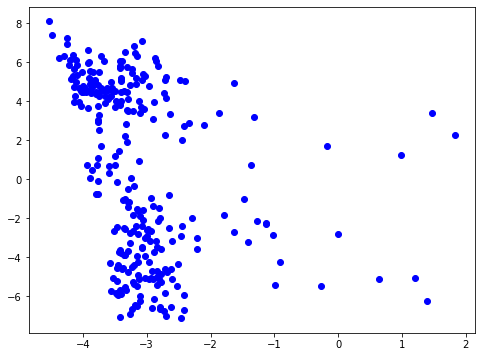

In [ ]:


# Perform PCA with two components (2D space)
pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
data_2d = pipe.fit_transform(x)

# Create a DataFrame for plotting (optional, but it's helpful for labeling points)
df_pca = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_pca['Labels'] = yc

# Perform PCA with two components (2D space)
pca = PCA(n_components=2)
#data_2d = pca.fit_transform(x)

# Create a DataFrame for plotting (optional, but it's helpful for labeling points)
df_pca = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_pca['Labels'] = yc

# Create a scatter plot for the two classes in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[df_pca['Labels'] == 'not_confident']['PC1'], df_pca[df_pca['Labels'] == 'not_confident']['PC2'], label='Not_Confident', c='blue')
plt.scatter(df_pca[df_pca['Labels'] == 'confident']['PC1'], df_pca[df_pca['Labels'] == 'Confident']['PC2'], label='Confident', c='red')

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA Plot for Two-Class Dataset')

# Add legend
plt.legend()

# Show the plot
plt.show()


















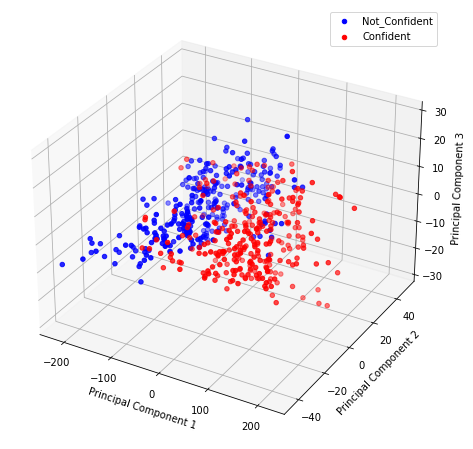

In [ ]:


# Perform PCA with two components (2D space)
pca = PCA(n_components=2)

pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
data_2d = pipe.fit_transform(x)
# Create a DataFrame for plotting (optional, but it's helpful for labeling points)
df_pca = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_pca['Labels'] = yc

# Perform PCA with two components (2D space)
pca = PCA(n_components=3)
data_2d = pca.fit_transform(x)

# Create a DataFrame for plotting (optional, but it's helpful for labeling points)
df_pca = pd.DataFrame(data_2d, columns=['PC1', 'PC2','PC3'])
df_pca['Labels'] = yc
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points for Class 1
ax.scatter(df_pca[df_pca['Labels'] == 'not_confident']['PC1'], df_pca[df_pca['Labels'] == 'not_confident']['PC2'], df_pca[df_pca['Labels'] == 'not_confident']['PC3'], c='blue', label='Not_Confident')

# Plot points for Class 2
ax.scatter(df_pca[df_pca['Labels'] == 'confident']['PC1'], df_pca[df_pca['Labels'] == 'confident']['PC2'], df_pca[df_pca['Labels'] == 'confident']['PC3'], c='red', label='Confident')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
#ax.set_title('PCA Plot for Two-Class Dataset (3D)')

# Add legend
ax.legend()

# Show the plot
plt.show()





